## **1. Problem Definition**

In this project, we aim to predict the Flavanoids content in wines using regression techniques. This task represents a shift from the original classification problem associated with the Wine dataset to a regression problem, showcasing the versatility of machine learning approaches in analyzing complex datasets.

### Why Predict Flavanoids?

Flavanoids are a type of polyphenol compound found in wines that contribute significantly to their taste, color, and potential health benefits. By predicting Flavanoids content based on other chemical properties, we can:

1. Gain insights into how various chemical components interact and influence specific attributes of wine.
2. Potentially assist in wine quality assessment and production processes.
3. Contribute to understanding the relationship between different chemical properties in wines.

This regression task demonstrates how machine learning can be applied to specific aspects of wine chemistry, potentially aiding both wine producers and researchers in the field of oenology.




# **2. Dataset Description**

We will be using the Wine dataset from scikit-learn, which originally served as a classification dataset. For our regression task, we'll be using the 'flavanoids' as our target variable and the remaining features as predictors.

### Features:

1. **Alcohol**: Alcohol content of the wine
2. **Malic acid**: Amount of malic acid in the wine
3. **Ash**: Ash content of the wine
4. **Alcalinity of ash**: Alkalinity of the wine's ash
5. **Magnesium**: Magnesium content
6. **Total phenols**: Total phenolic compounds
7. **Nonflavanoid phenols**: Amount of non-flavanoid phenols
8. **Proanthocyanins**: Proanthocyanin content
9. **Color intensity**: Intensity of the wine's color
10. **Hue**: Hue of the wine
11. **OD280/OD315 of diluted wines**: Ratio of absorbance at 280nm to 315nm
12. **Proline**: Proline amino acid content

### Target Variable:

- **Flavanoids**: Amount of flavanoids in the wine

### Dataset Characteristics:

- Number of Instances: 178
- Number of Features: 13 (including the target variable)
- Feature Types: Continuous

This dataset provides a rich set of chemical properties that can potentially influence or correlate with the Flavanoids content in wines. Our task is to build a regression model that can accurately predict the Flavanoids content based on these other chemical properties.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance


In [2]:
# Load the wine dataset
wine = load_wine()
Data = pd.DataFrame(wine.data, columns=wine.feature_names)

print('Shape of Dataset is: ', Data.shape)

Shape of Dataset is:  (178, 13)


In [3]:
Data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# **3. EDA**

## 3.1. EDA - Descriptive

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
Data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# chekc null
Data.isna().sum().sum()

0

In [7]:
# check duplicate
Data.duplicated().sum()

0

## 3.2. EDA - Visualization

In [8]:
# Set a consistent color palette
palette = sns.color_palette("Blues_r")
sns.set_palette(palette)

In [9]:
# Function to create subplots
def create_subplots(data, plot_func, n_cols=3, figsize=(15, 15), **kwargs):
    n_features = len(data.columns)
    n_rows = (n_features - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(data.columns):
        plot_func(data=data, x=col, ax=axes[i], **kwargs)
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)

    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

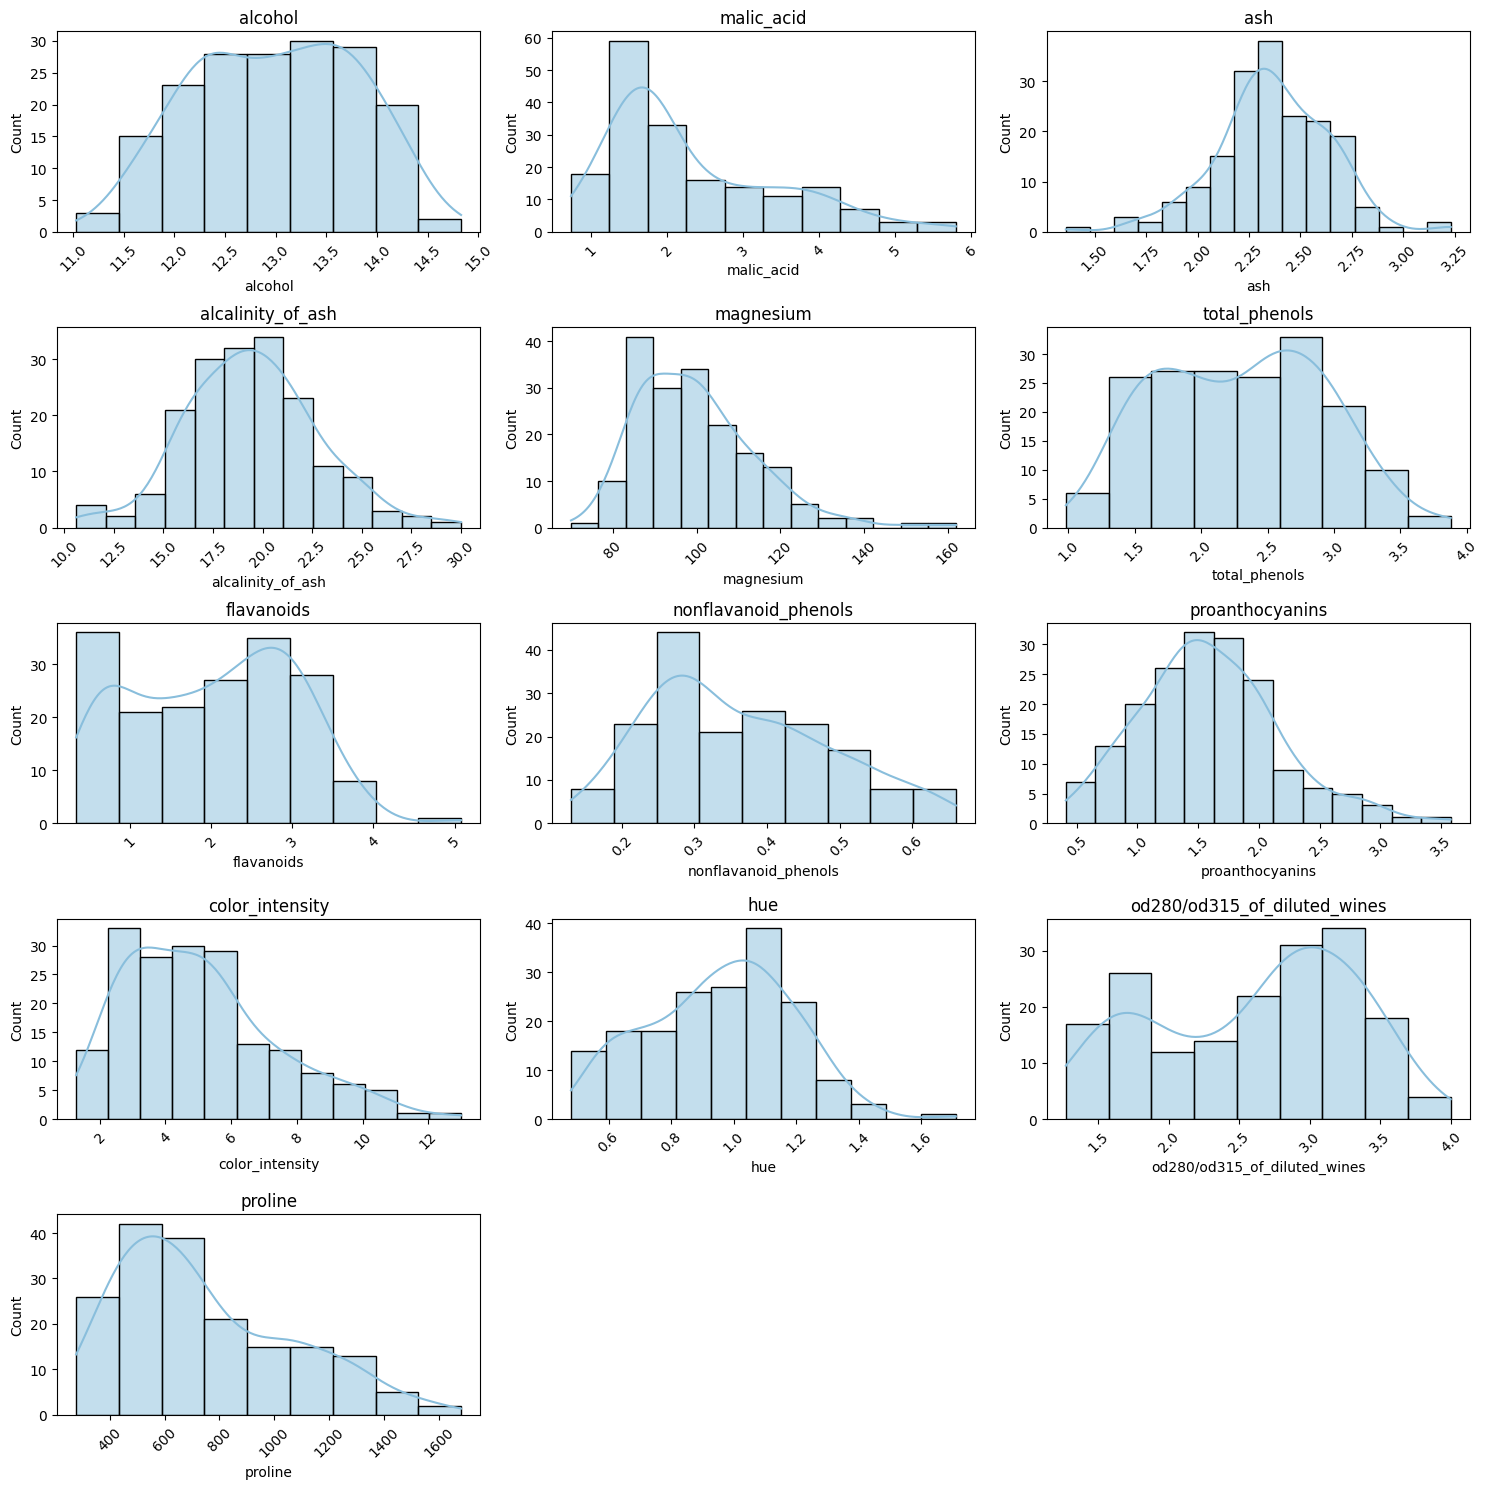

In [10]:
# Histogram
# Show the distribution of each feature.

create_subplots(Data, sns.histplot, kde=True, color=palette[3])

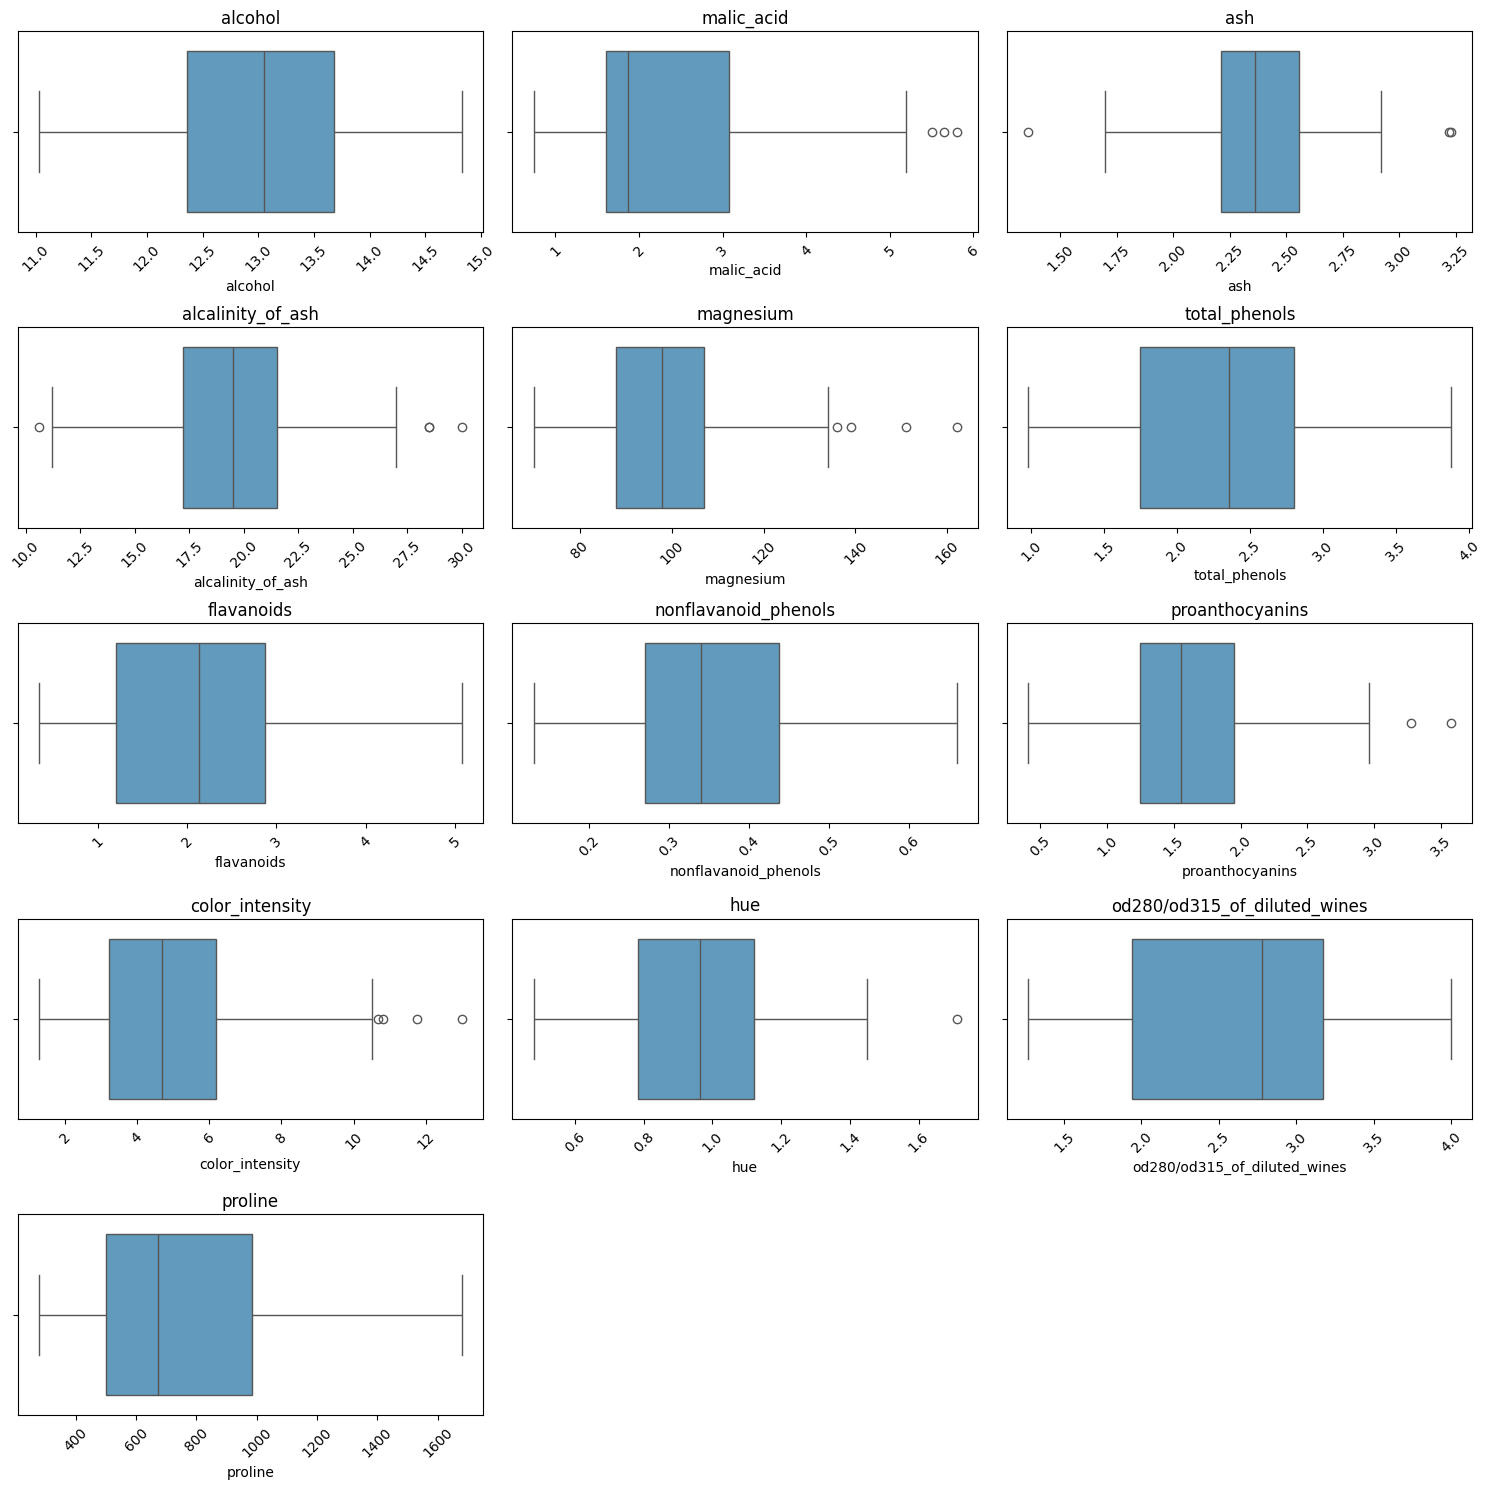

In [11]:
# Box Plots
# Displays the distribution and potential outliers of selecteeachd features.

create_subplots(Data, sns.boxplot, color=palette[2])

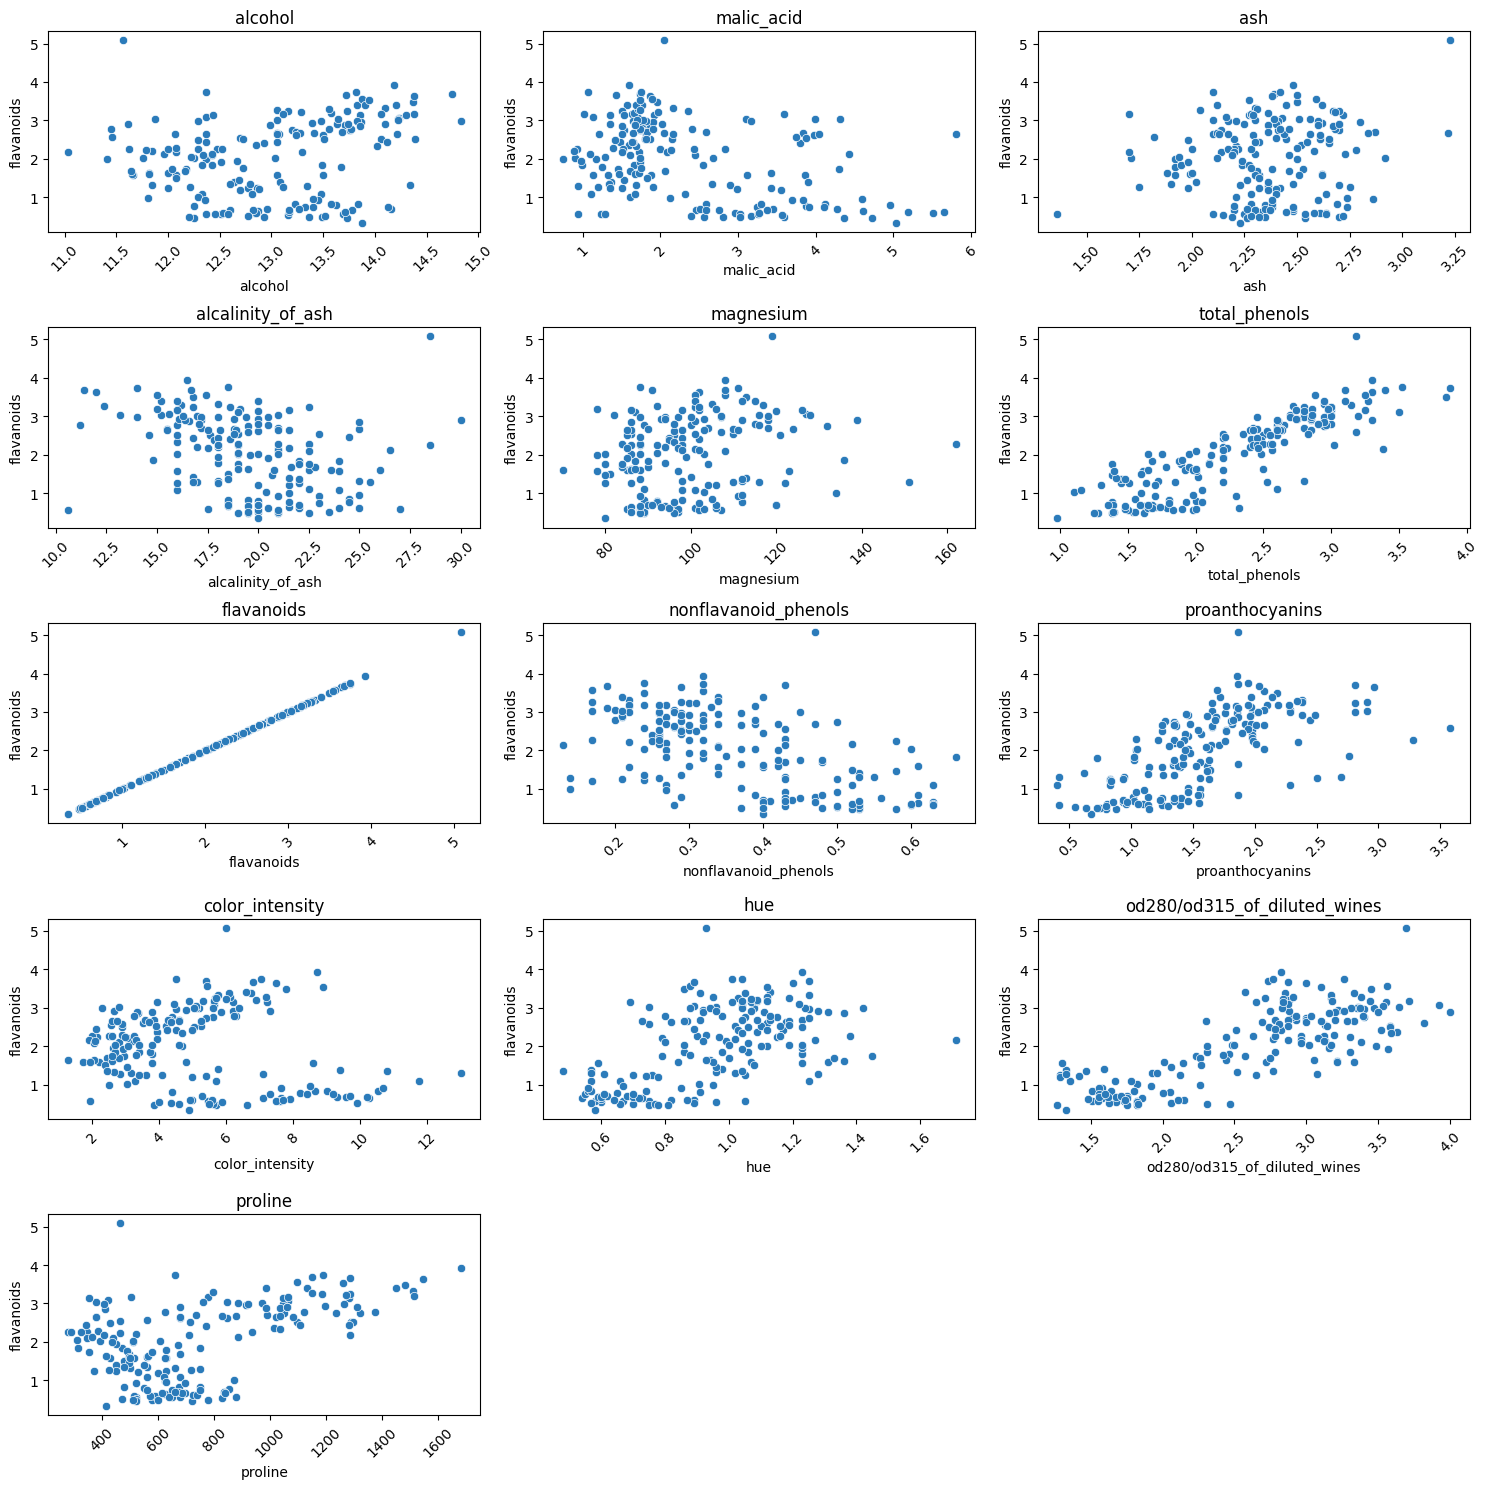

In [12]:
# Scatter Plots (against 'flavanoids')
# Show the relationship between each feature and 'flavanoids'.

def scatter_with_flavanoids(data, x, ax, **kwargs):
    sns.scatterplot(data=data, x=x, y='flavanoids', ax=ax, **kwargs)

create_subplots(Data, scatter_with_flavanoids, color=palette[1])

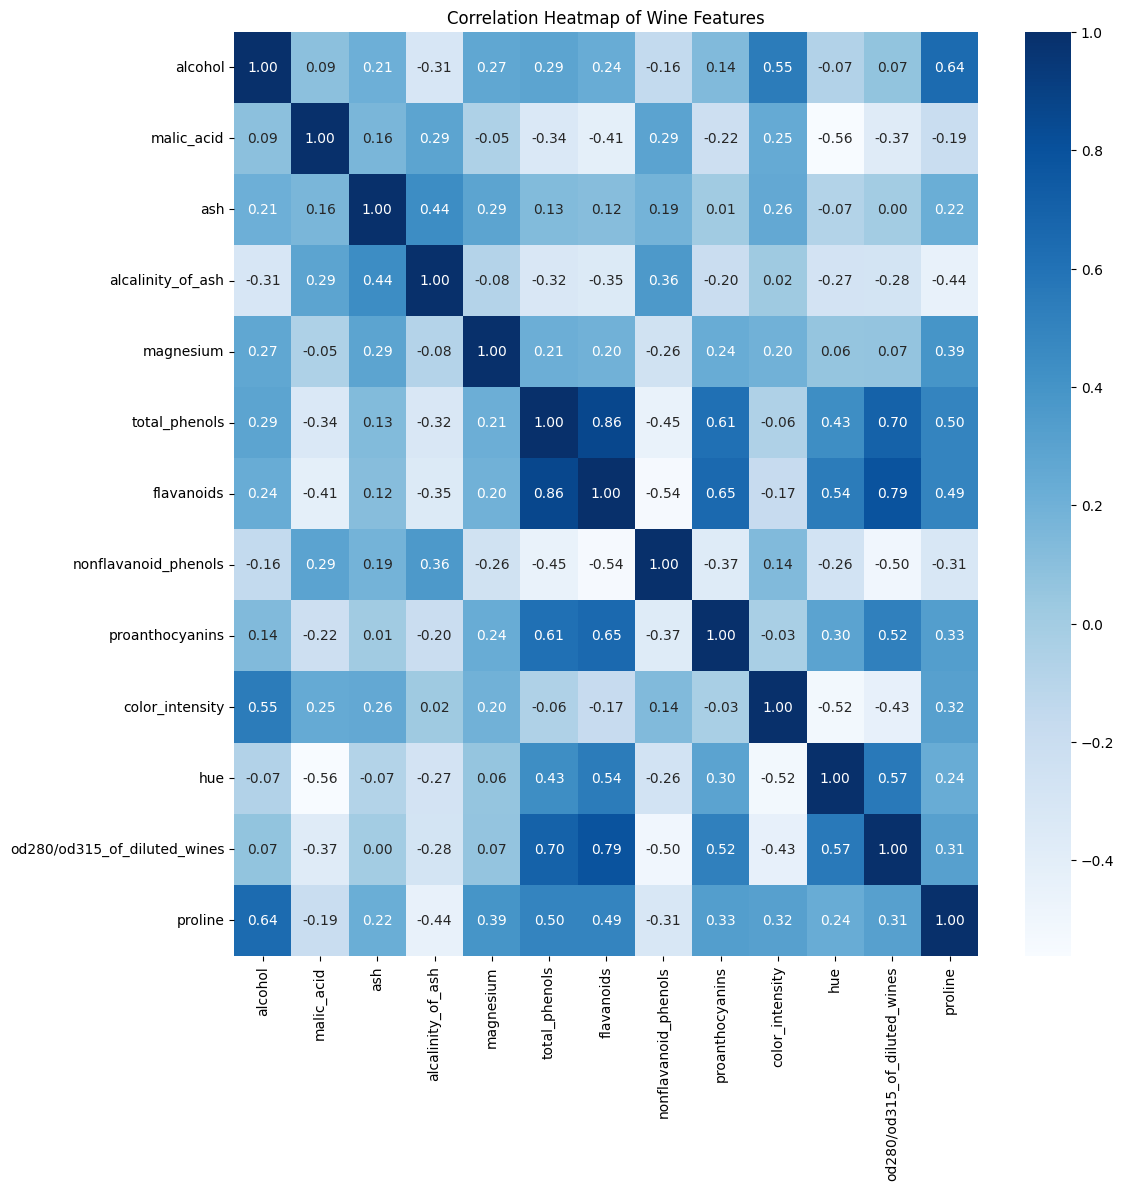

In [13]:
# Correlation Heatmap
# Show the correlation between features.

plt.figure(figsize=(12, 12))
sns.heatmap(Data.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap of Wine Features")
plt.show()

# **4. Preprocessing & Model Selection**

In [14]:
X = Data.copy()
y = X['flavanoids']
X = X.drop('flavanoids', axis=1)

In [15]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor())
])

# 5. Hyperparameter Tuning

In [16]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2, 3]  # p=1 for manhattan, p=2 for euclidean, p=3 for minkowski
}

In [17]:
# Create custom scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)


# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring={'mse': mse_scorer, 'r2': r2_scorer},
    refit='mse',  # Refit on the best model found using MSE
    n_jobs=-1
)
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'knn__p': [1, 2, 3],
                         'knn__weights': ['uniform', 'distance']},
             refit='mse',
             scoring={'mse': make_scorer(mean_squared_error, greater_is_better=False),
                      'r2': make_scorer(r2_score)})

In [18]:
# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters and scores
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_:.4f}")
print(f"Best R2: {grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]:.4f}")

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
Best MSE: 0.1849
Best R2: 0.4416


# 6. Model Training

In [19]:
# Perform cross-validation on the best model

cv_mse = cross_val_score(best_model, X, y, cv=5, scoring=mse_scorer)
cv_r2 = cross_val_score(best_model, X, y, cv=5, scoring=r2_scorer)

# Print cross-validation results
print(f"\nCross-validation MSE: {-cv_mse.mean():.4f} (+/- {cv_mse.std() * 2:.4f})")
print(f"Cross-validation R2: {cv_r2.mean():.4f} (+/- {cv_r2.std() * 2:.4f})")


Cross-validation MSE: 0.1849 (+/- 0.2250)
Cross-validation R2: 0.4416 (+/- 0.4329)


In [20]:
# Fit the best model on the entire dataset for predict unseen data
best_model.fit(X, y)




Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=7, p=1,
                                     weights='distance'))])

# 7. Feature Importance Analysis: Permutation Importance

Permutation importance is a method used to assess the importance of features in a model. It works by randomly shuffling the values of each feature and measuring how much the model's performance decreases. A greater drop in performance indicates a more important feature.

### Key Points:
- **Model-Agnostic**: Can be applied to any model, not just tree-based ones.
- **Captures Non-Linearity**: It identifies important features based on their actual impact on the model, including non-linear relationships.
- **Multiple Repeats**: To ensure stable results, it's common to shuffle features multiple times.
- **Independence Assumption**: The method assumes features are independent, which may not always be true in practice.

In our analysis, permutation importance helps us understand which features significantly influence our KNN model's predictions for flavanoid content in wines, complementing traditional correlation analysis.

It's crucial to remember that these findings are specific to our KNN model and may differ for other modeling approaches or target variables.

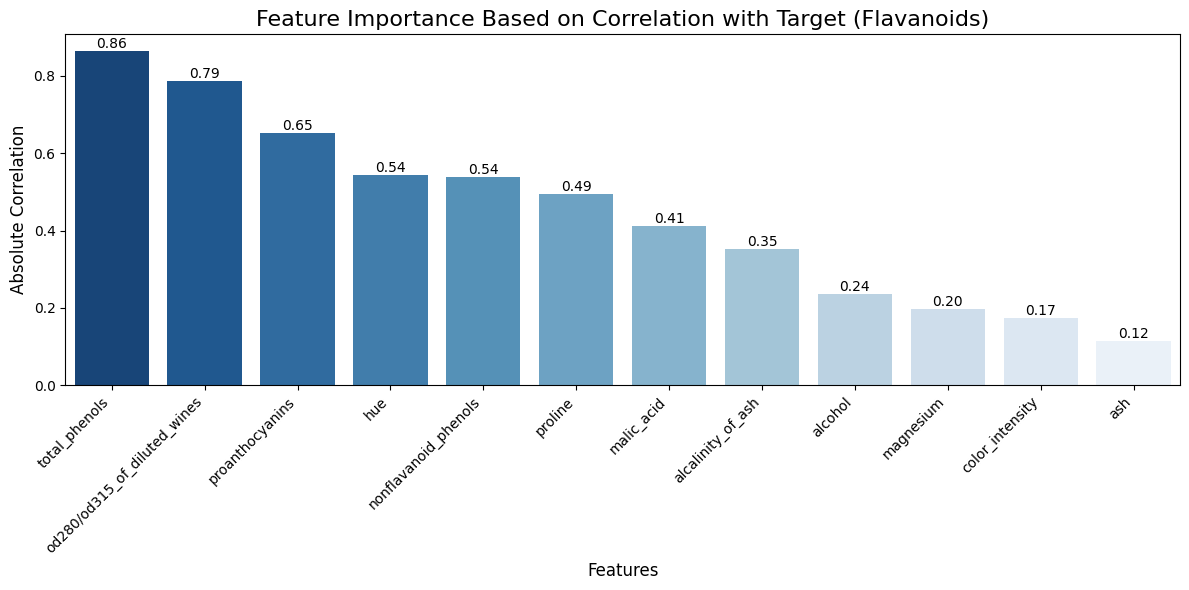


Feature Importance (based on correlation with target):
total_phenols                   0.864564
od280/od315_of_diluted_wines    0.787194
proanthocyanins                 0.652692
hue                             0.543479
nonflavanoid_phenols            0.537900
proline                         0.494193
malic_acid                      0.411007
alcalinity_of_ash               0.351370
alcohol                         0.236815
magnesium                       0.195784
color_intensity                 0.172379
ash                             0.115077
dtype: float64


In [23]:
# Feature importance (using correlation with target)
# Calculate correlations
correlations = X.corrwith(y).abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="Blues_r")

# Customize the plot
plt.title("Feature Importance Based on Correlation with Target (Flavanoids)", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Absolute Correlation", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(correlations.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

# Print correlations
print("\nFeature Importance (based on correlation with target):")
print(correlations)

In [22]:
# Permutation importance
perm_importance = permutation_importance(best_model, X, y, n_repeats=10, random_state=42)
perm_importance_sorted = sorted(zip(perm_importance.importances_mean, X.columns), reverse=True)
print("\nFeature Importance (based on permutation importance):")
for importance, feature in perm_importance_sorted:
    print(f"{feature}: {importance:.4f}")


Feature Importance (based on permutation importance):
total_phenols: 0.0751
od280/od315_of_diluted_wines: 0.0533
alcohol: 0.0387
nonflavanoid_phenols: 0.0363
proanthocyanins: 0.0352
color_intensity: 0.0341
ash: 0.0317
alcalinity_of_ash: 0.0317
proline: 0.0314
malic_acid: 0.0262
hue: 0.0253
magnesium: 0.0243
